<a href="https://colab.research.google.com/github/Nataalfa/Model-For-Breast-Cancer-Prediction/blob/main/Breast_cancer_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction model 

***NOTE**

i got this dataset from kaggle and rename it based on kaggle too

Dataset 👉 : [Here](https://drive.google.com/file/d/1QYdyeb7tuYnRwkJCpHRs-cZ0Ls7UEKGX/view?usp=sharing)

In [1]:
#Mounting colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Read file 
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/Kaggle /Breast cancer diagnosis/wdbc.data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     568 non-null    int64  
 1   842302    568 non-null    int64  
 2   M         568 non-null    object 
 3   17.99     568 non-null    float64
 4   10.38     568 non-null    float64
 5   122.8     568 non-null    float64
 6   1001      568 non-null    float64
 7   0.1184    568 non-null    float64
 8   0.2776    568 non-null    float64
 9   0.3001    568 non-null    float64
 10  0.1471    568 non-null    float64
 11  0.2419    568 non-null    float64
 12  0.07871   568 non-null    float64
 13  1.095     568 non-null    float64
 14  0.9053    568 non-null    float64
 15  8.589     568 non-null    float64
 16  153.4     568 non-null    float64
 17  0.006399  568 non-null    float64
 18  0.04904   568 non-null    float64
 19  0.05373   568 non-null    float64
 20  0.01587   568 non-null    float6

In [4]:
#Rename Important column
df.rename(columns = {'M':'Diagnose', '17.99':'Radius','10.38':'Texture','122.8':'Perimeter',
                     '1001':'Area', '0.1184':'Smoothness', '0.2776':'Compactness', '0.3001':'Concavity',
                     '0.1471':'Symmetry', '0.2419':'Fractal_Dimension', '0.07871':'Mean_Intensity','1.095':'Standard_Error',
                     '0.9053':'Worst_Radius','8.589':'Worst_Texture', '153.4':'Worst_Perimeter','0.006399':'Worst_Area',
                     '0.04904':'Worst_Smoothness', '0.05373':'Worst_Compactness', '0.01587': 'Worst_Concavity'}, inplace = True)
# df.info()

In [5]:
#set df to only important column
df = df[['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Symmetry',
         'Fractal_Dimension', 'Mean_Intensity', 'Standard_Error', 'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter',
         'Worst_Area', 'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity', 'Diagnose']]

In [6]:
df.head()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Symmetry,Fractal_Dimension,Mean_Intensity,Standard_Error,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Diagnose
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,M
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,M
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,M
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,M
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,M


## Simple EDA 

In [ ]:
df.describe()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Symmetry,Fractal_Dimension,Mean_Intensity,Standard_Error,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,0.403958,1.217402,2.855984,40.138025,0.007042,0.025437,0.031855,0.011789
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,0.276038,0.551979,2.009288,45.282406,0.003005,0.017897,0.030199,0.006173
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,0.232375,0.833150,1.605000,17.850000,0.005166,0.013048,0.015062,0.007634
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,0.323950,1.109500,2.285500,24.485000,0.006374,0.020435,0.025875,0.010920
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,0.477325,1.474250,3.336750,45.017500,0.008151,0.032218,0.041765,0.014710
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790


In [ ]:
#TARGET
df.Diagnose.value_counts()

B    357
M    211
Name: Diagnose, dtype: int64

In [ ]:
columns_x = df[['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Symmetry',
            'Fractal_Dimension', 'Mean_Intensity', 'Standard_Error', 'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter',
            'Worst_Area', 'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity']]
columnsx2= [['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Symmetry',
            'Fractal_Dimension', 'Mean_Intensity', 'Standard_Error', 'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter',
            'Worst_Area', 'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity']]             

In [7]:
df["Diagnose"] = df["Diagnose"].map({"M": 1, "B" : 2})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

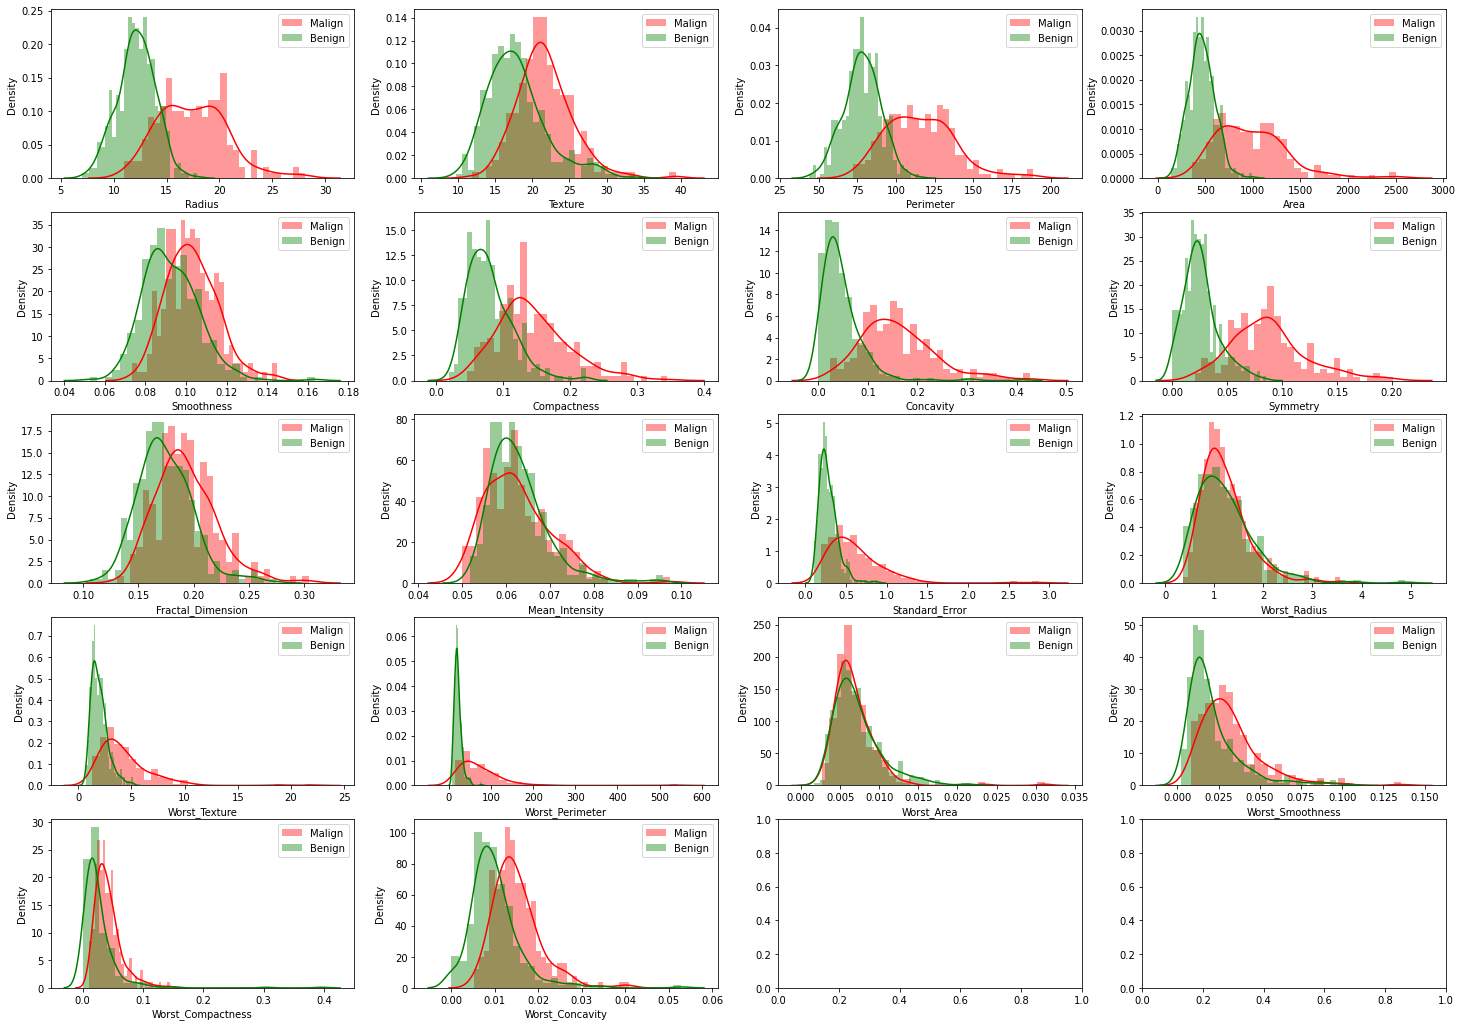

In [ ]:
#Seeing the dist
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(25,18))

for i, column in enumerate(columns_x):
  ax = axes[i // 4, i % 4]
  sns.distplot(df[df.Diagnose == 1][column], bins=30, color='red', label='Malign', ax=ax)
  sns.distplot(df[df.Diagnose == 2][column], bins=30, color='green', label='Benign', ax=ax)
  ax.legend()



# Prepare train and test datasets

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Diagnose', axis=1)
y = df['Diagnose']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((454, 18), (114, 18), (454,), (114,))

In [10]:
#Preprocess data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

In [9]:
#Install lazy predict for model selection, it help u to set a baseline from the models 
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#Fit the train and test data to lazypredict
#Model selection 
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_trains,X_tests,y_train,y_test)
model_dict = clf.provide_models(X_trains,X_tests,y_train,y_test)
models



100%|██████████| 29/29 [00:03<00:00,  9.62it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.96,0.96,0.96,0.26
RandomForestClassifier,0.96,0.96,0.96,0.96,0.31
ExtraTreesClassifier,0.96,0.96,0.96,0.96,0.21
QuadraticDiscriminantAnalysis,0.95,0.94,0.94,0.95,0.03
LinearDiscriminantAnalysis,0.95,0.94,0.94,0.95,0.04
RidgeClassifierCV,0.95,0.94,0.94,0.95,0.03
CalibratedClassifierCV,0.95,0.94,0.94,0.95,0.08
RidgeClassifier,0.95,0.94,0.94,0.95,0.02
LinearSVC,0.94,0.94,0.94,0.94,0.05


In [12]:
#Building Pipeline, for this one i choose RandomForestClassifier model for the ML model
#Import requirements library
import lightgbm 
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
pipeline2 = Pipeline([
    ('prep', scaler),
    ('algo', LGBMClassifier())
])

pipeline2.get_params().keys()#To check what parameters should be tuned and what shouldn't be  

dict_keys(['memory', 'steps', 'verbose', 'prep', 'algo', 'prep__copy', 'prep__with_mean', 'prep__with_std', 'algo__boosting_type', 'algo__class_weight', 'algo__colsample_bytree', 'algo__importance_type', 'algo__learning_rate', 'algo__max_depth', 'algo__min_child_samples', 'algo__min_child_weight', 'algo__min_split_gain', 'algo__n_estimators', 'algo__n_jobs', 'algo__num_leaves', 'algo__objective', 'algo__random_state', 'algo__reg_alpha', 'algo__reg_lambda', 'algo__silent', 'algo__subsample', 'algo__subsample_for_bin', 'algo__subsample_freq'])

In [13]:
#Set parameters for parameter tuning
parameters2 = {
    'algo__learning_rate': [0.1,0.01, 0.001, 0.0005],
    'algo__num_leaves': [2,3,4,5,6,31],
    'algo__n_estimators': [10,20,30,40,50,60,70,80,90,100],
    'algo__boosting_type': ['gbdt', 'dart', 'rf'],
    'algo__max_depth': [-1,0,1,2,3,4,5,6]
}

In [18]:
#Cross validate data and search the best parameters
from sklearn.model_selection import GridSearchCV

model2 = GridSearchCV(pipeline2, parameters2, cv=4, scoring='recall', n_jobs=-1, verbose=1)
model2.fit(X_train, y_train)

model2.fit(X_train, y_train)

print(model2.best_params_)
print(model2.score(X_train, y_train), model2.best_score_, model2.score(X_test,y_test))

Fitting 4 folds for each of 5760 candidates, totalling 23040 fits
Fitting 4 folds for each of 5760 candidates, totalling 23040 fits
{'algo__boosting_type': 'gbdt', 'algo__learning_rate': 0.1, 'algo__max_depth': -1, 'algo__n_estimators': 90, 'algo__num_leaves': 5}
1.0 0.9230343300110742 0.9285714285714286


In [91]:
from sklearn import metrics
y_pred2 = model2.predict(X_test)
# Hitung TP, TN, FP, dan FN
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print('TP:', TP)
print('TN:', TN)
print('FP:', FP)
print('FN:', FN)

TP: 68
TN: 39
FP: 3
FN: 4


In [27]:
import pandas as pd
import pandas as pd

# Membuat data frame dari y_test dan y_pred
df_prediction = pd.DataFrame({'Asli': y_test, 'predict': y_pred2})
df_prediction[['Asli', 'predict']] = df_prediction[['Asli', 'predict']].replace({1: 'M', 2 : 'B'})

# Tampilkan data frame
print(f'row dan column : {df_prediction.shape}')
df_prediction

row dan column : (114, 2)


,Asli,predict
256,M,M
427,B,B
429,M,M
362,B,M
413,M,M
...,...,...
500,M,M
127,B,M
257,M,M
227,B,B


In [36]:
concatenated_df = pd.concat([X_test, df_prediction], axis=1)
concatenated_df.Asli.value_counts()

B    72
M    42
Name: Asli, dtype: int64

In [47]:
concatenated_df = concatenated_df.rename(columns = {'Asli':'Actual', 'predict':'Predicted'})

In [66]:
Cancer = concatenated_df[(concatenated_df['Actual'] == 'M') & (concatenated_df['Predicted'] == 'M')]
print(f'Total Correctly Predicted As Cancer: {len(Cancer.Actual)}')
print()
Cancer.head()

Total Correctly Predicted As Cancer: 39



,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Symmetry,Fractal_Dimension,Mean_Intensity,Standard_Error,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Actual,Predicted
256,15.32,17.27,103.20,713.30,0.13,0.23,0.24,0.12,0.24,0.08,0.66,1.06,4.06,59.46,0.01,0.05,0.05,0.02,M,M
429,14.90,22.53,102.10,685.00,0.10,0.22,0.27,0.10,0.20,0.07,0.25,0.87,3.47,24.19,0.01,0.06,0.08,0.02,M,M
413,15.13,29.81,96.71,719.50,0.08,0.05,0.05,0.03,0.19,0.05,0.47,1.63,3.04,45.38,0.01,0.01,0.02,0.01,M,M
350,15.75,19.22,107.10,758.60,0.12,0.24,0.29,0.12,0.24,0.08,0.52,1.32,3.48,51.22,0.01,0.07,0.10,0.02,M,M
515,18.31,20.58,120.80,1052.00,0.11,0.12,0.16,0.09,0.19,0.06,0.54,0.92,3.22,67.36,0.01,0.02,0.03,0.01,M,M


In [65]:
F_Cancer = concatenated_df[(concatenated_df['Actual'] == 'B') & (concatenated_df['Predicted'] == 'M')]
print(f'Total False Predicted Cancer: {FN}')
print()
F_Cancer.head()

Total False Predicted Cancer: 4



,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Symmetry,Fractal_Dimension,Mean_Intensity,Standard_Error,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Actual,Predicted
362,16.50,18.29,106.60,838.10,0.10,0.08,0.06,0.05,0.15,0.06,0.34,1.44,2.34,33.58,0.01,0.02,0.02,0.01,B,M
274,11.89,17.36,76.20,435.60,0.12,0.07,0.06,0.07,0.20,0.06,0.64,2.29,4.02,48.84,0.01,0.01,0.01,0.02,B,M
517,12.88,18.22,84.45,493.10,0.12,0.17,0.05,0.05,0.17,0.07,0.44,1.17,3.18,34.37,0.01,0.02,0.01,0.01,B,M
127,15.10,16.39,99.58,674.50,0.12,0.18,0.11,0.09,0.20,0.06,0.43,1.07,2.80,39.84,0.01,0.04,0.03,0.02,B,M


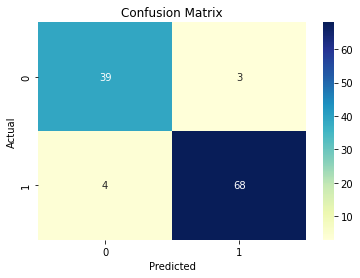

1 : Tumor
0 : Cancer

Total Correctly predicted as Malignant(Cancer) : 39
Total Correctly predicted as Benign(Tumor)    : 68


In [98]:
import seaborn as sns

# Visualize Confusion matrix with seaborn 
sns.heatmap(confusion_matrix, annot = True, fmt ="d", cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('1 : Tumor')
print('0 : Cancer')
print()
print(f'Total Correctly predicted as Malignant(Cancer) : {TN}')
print(f'Total Correctly predicted as Benign(Tumor)    : {TP}')

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))
print('=========================================================================')
print()
print('From this report we know this model recall > f1-score when predicted (Cancer: 1)(93%) ')
print('Which is good and It is okay to classify a healthy person as having cancer and following up with more medical tests')
print('And The accuracy of this model is quiet good too which achieved 94%')

              precision    recall  f1-score   support

           1       0.91      0.93      0.92        42
           2       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


From this report we know this model recall > f1-score when predicted (Cancer: 1)(93%) 
Which is good and It is okay to classify a healthy person as having cancer and following up with more medical tests
And The accuracy of this model is quiet good too which achieved 94%


## I choose scoring with recall because <b>on medical test recall is important</b>

Because It is okay to **classify a healthy person as having cancer and following up with more medical tests**, 


but it is definitely **not okay to miss identifying a cancer patient or classifying a cancer patient as healthy since the person’s life is at stake.**   
[Source](https://medium.com/analytics-vidhya/precision-recall-tradeoff-for-real-world-use-cases-c6de4fabbcd0)

In [95]:
#Save model to drive
import pickle
with open('/content/drive/MyDrive/Kaggle /Breast cancer diagnosis/model_cancer_predict.pickle', 'wb') as handle:
    pickle.dump(model2, handle, protocol=pickle.HIGHEST_PROTOCOL)